#### Bagging and Random Forest

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

In [2]:
def bag(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], y[indices]

In [3]:
def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

In [4]:
class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
    
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split, 
                                          max_depth=self.max_depth, max_features=self.max_features)
            X_sample, y_sample = bag(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X):
        tree_predict = np.array([tree.predict(X) for tree in self.trees])
        tree_predict = np.swapaxes(tree_predict, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict]
        return np.array(y_pred)

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = RandomForest(n_trees=10, max_depth=10, max_features='sqrt')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ", acc)

Accuracy:  0.9649122807017544


#### Gradient Boost

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate=0.1):
    y_hat_train = np.repeat(np.mean(y_train), len(y_train))
    y_hat_test = np.repeat(np.mean(y_train), len(X_test))
    
    residuals = y_train - y_hat_train
    
    for i in range(boosting_rounds):
        model = model.fit(X_train, residuals)
        y_hat_train += learning_rate * model.predict(X_train)
        y_hat_test += learning_rate * model.predict(X_test)
        residuals = y_train - y_hat_train
    return y_hat_train, y_hat_test

In [8]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, n_targets=1, bias=0, 
                                 noise=20, shuffle=True, random_state=13)

X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]

In [9]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=3)

In [10]:
mse_train = list()
n_rounds = np.arange(5, 101, 5)
for n_round in n_rounds:
    y_hat_train, _ = GradBoost(model, X_train, y_train, X_test, boosting_rounds=n_round, learning_rate=0.1)
    print("round #", n_round)
    mse_train.append(np.mean((y_train - y_hat_train) ** 2))

round # 5
round # 10
round # 15
round # 20
round # 25
round # 30
round # 35
round # 40
round # 45
round # 50
round # 55
round # 60
round # 65
round # 70
round # 75
round # 80
round # 85
round # 90
round # 95
round # 100


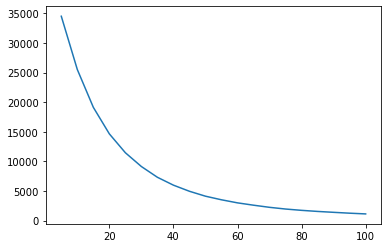

In [11]:
plt.plot(n_rounds, mse_train)

###### Plotting Actual Vs Predicted for various #rounds.

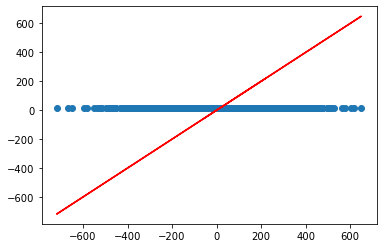

In [12]:
n_round = 0
y_hat_train, y_hat_test = GradBoost(model, X_train, y_train, X_test, boosting_rounds=n_round, learning_rate=0.1)
plt.scatter(y_train, y_hat_train) #Predicted
plt.plot(y_train, y_train, color='r') #Actual

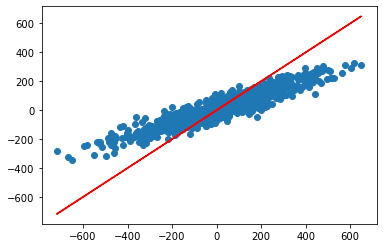

In [13]:
n_round = 20
y_hat_train, y_hat_test = GradBoost(model, X_train, y_train, X_test, boosting_rounds=n_round, learning_rate=0.1)
plt.scatter(y_train, y_hat_train) #Predicted
plt.plot(y_train, y_train, color='r') #Actual

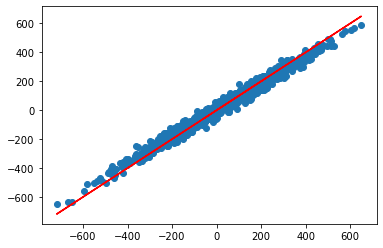

In [14]:
n_round = 100
y_hat_train, y_hat_test = GradBoost(model, X_train, y_train, X_test, boosting_rounds=n_round, learning_rate=0.1)
plt.scatter(y_train, y_hat_train) #Predicted
plt.plot(y_train, y_train, color='r') #Actual